In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
transforms = torchvision.transforms
# torchvision.__version__

# import torchvision.tranforms as transforms

In [69]:
# Device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [70]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


In [71]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

In [72]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

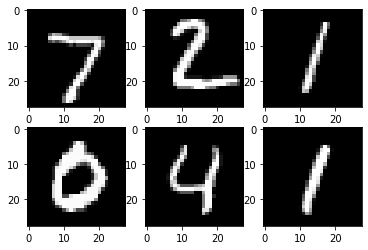

In [73]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [74]:
# fully connected neural network with 1 hidden layer

class NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NN, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.fc2(out)
        return out

In [75]:
# model
model = NN(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [76]:
# Training the model

n_total_steps = len(train_loader)
# create_graph=True
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        output = model(images)
        loss = criterion(output, labels)
        # print(loss)

        # backward pass and optimizer
        optimizer.zero_grad()        
        loss.backward()
        optimizer.step()        

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.3711
Epoch [1/2], Step [200/600], Loss: 0.3226
Epoch [1/2], Step [300/600], Loss: 0.3069
Epoch [1/2], Step [400/600], Loss: 0.2247
Epoch [1/2], Step [500/600], Loss: 0.1548
Epoch [1/2], Step [600/600], Loss: 0.1368
Epoch [2/2], Step [100/600], Loss: 0.1084
Epoch [2/2], Step [200/600], Loss: 0.1455
Epoch [2/2], Step [300/600], Loss: 0.1232
Epoch [2/2], Step [400/600], Loss: 0.0778
Epoch [2/2], Step [500/600], Loss: 0.0943
Epoch [2/2], Step [600/600], Loss: 0.0923


In [77]:
# Test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 96.93 %
